<a href="https://colab.research.google.com/github/ponomarevaJV/PDA_SOL/blob/main/%D0%9F%D1%80.1.(%20%D0%BF%D1%80%D0%BE%D0%B3.%20%D1%81%D1%80%D0%B5%D0%B4.%20%D1%81%D0%B1%D0%BE%D1%80%20%D0%B8%20%D0%BA%D0%BE%D0%BD%D1%81.%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 1. Начало работы с API

# 1.1 Скачивание наборов данных Kaggle

Дополнительная информация по работе с [Kaggle API](https://github.com/Kaggle/kaggle-api)

1. **Создайте ключ `API` в `Kaggle`**.

Моя учетная запись -> Settings-> API -> Создать новые токены API.

На ваш компьютер будет загружен файл `kaggle.json`. Вы можете загрузить на `Google` Диск вручную или использовать для загрузки приведенный ниже скрипт.

Если вы хотите использовать скрипт для загрузки файла `kaggle.json`, используйте следующий фрагмент в ячейке кода:

In [ ]:
from google.colab import files
files.upload()

Установите `Kaggle API`, используя

In [ ]:
!pip install -q kaggle

Переместите файл `kaggle.json` в **~/.kaggle**, где клиент `API` ожидает расположения вашего токена:

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Предоставьте разрешения на изменение, чтобы избежать предупреждения при запуске инструмента `Kaggle`.

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

Теперь вы можете получить доступ к наборам данных с помощью клиента

In [ ]:
!kaggle datasets list

In [ ]:
import kaggle

# List of all datasets available on Kaggle
kaggle.api.dataset_list()

In [ ]:
# поиск наборов данных на Kaggle о ""ключевое слово"""
datasets = kaggle.api.datasets_list(search="education")

print(datasets)

[{'subtitleNullable': 'From World Bank Open Data', 'creatorNameNullable': 'Kaggle Team', 'creatorUrlNullable': 'kaggleteam', 'totalBytesNullable': 79282075, 'urlNullable': 'https://www.kaggle.com/datasets/theworldbank/education-statistics', 'licenseNameNullable': 'Unknown', 'descriptionNullable': None, 'ownerNameNullable': 'World Bank', 'ownerRefNullable': 'organizations/theworldbank', 'titleNullable': 'Education Statistics', 'currentVersionNumberNullable': 45, 'usabilityRatingNullable': 0.5882353, 'id': 398, 'ref': 'theworldbank/education-statistics', 'subtitle': 'From World Bank Open Data', 'hasSubtitle': True, 'creatorName': 'Kaggle Team', 'hasCreatorName': True, 'creatorUrl': 'kaggleteam', 'hasCreatorUrl': True, 'totalBytes': 79282075, 'hasTotalBytes': True, 'url': 'https://www.kaggle.com/datasets/theworldbank/education-statistics', 'hasUrl': True, 'lastUpdated': '2019-05-16T20:10:10.61Z', 'downloadCount': 31640, 'isPrivate': False, 'isFeatured': False, 'licenseName': 'Unknown', 'h

In [ ]:
!kaggle datasets list -s "education"

In [ ]:
!pip install pandas
import pandas as pd

In [ ]:
datasets = kaggle.api.datasets_list(search="education")
df1=pd.DataFrame(datasets)
pd.DataFrame(datasets)

In [ ]:
df1.to_excel("education.xlsx", sheet_name='education')

In [ ]:
from google.colab import files
files.download('education.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Изучим датасет **The Times Higher Education World University Rankings**


In [ ]:
datasets = kaggle.api.datasets_list(search="The Times Higher Education World University Rankings")
df1=pd.DataFrame(datasets)
pd.DataFrame(datasets)

Download Dataset.

In [ ]:
!kaggle datasets download -d r1chardson/the-world-university-rankings-2011-2023

In [ ]:
!ls

education.xlsx	kaggle.json  sample_data  the-world-university-rankings-2011-2023.zip


In [ ]:
import zipfile

with zipfile.ZipFile("the-world-university-rankings-2011-2023.zip","r") as zip_ref:

    # extracting content in the zipfile
    zip_ref.extractall()



In [ ]:
!ls

In [ ]:
# reading the contents of the "NetFlix.csv"
df = pd.read_csv("2023_rankings.csv")

# printing first 6 raws of the dataframe
df.head(100)

In [ ]:
df.info()

In [ ]:
my_df =df[['rank','name','scores_overall','scores_teaching','scores_research','location','stats_number_students']].copy()

In [ ]:
my_df.info()

In [ ]:
my_df

In [ ]:
my_df.isnull().values.any()

In [ ]:
my_df.isnull().sum()

In [ ]:
my_df.isna().sum()/(len(df))*100

In [ ]:
my_df.isnull().sum()/(len(df))*100

In [ ]:
df2 = my_df.dropna()

In [ ]:
df2

In [ ]:
df2.isnull().values.any()

False

    Только рф

In [ ]:
rslt_df = df2[df2['location'] == 'Russian Federation']

In [ ]:
rslt_df

In [ ]:
rslt_df.reset_index(drop=True, inplace=True)

In [ ]:
rslt_df

In [ ]:
rslt_df.info()

In [ ]:
rslt_df['scores_overall']=rslt_df['scores_overall'].str[-4:]

In [ ]:
rslt_df.info()

In [ ]:
rslt_df

In [ ]:
rslt_df['scores_overall'] = rslt_df['scores_overall'].astype('float64')

In [ ]:
rslt_df.info()

In [ ]:
dd=rslt_df

In [ ]:
##dd['stats_number_students'] = [x.replace(',', '.') for x in dd['stats_number_students']]

In [ ]:
## dd.info()

In [ ]:
##dd['scores_overall'] = dd['scores_overall'].astype('float64')

In [ ]:
dd.to_excel("education_ru.xlsx", sheet_name='education_ru')
from google.colab import files
files.download('education_ru.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 1.2. GitHub API

**1.2.1.** Сгенерировать персональный токен на 7 дней на странице https://github.com/settings/tokens/new

![](https://drive.google.com/uc?export=view&id=1rNV_0jXbY4GLYAlFu-SUbOoGYWk9hKGe)





**1.2.2.**	Настройка окружения: убедитесь, что у вас установлены необходимые библиотеки: requests, pandas, matplotlib, seaborn.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1.2.3.** Подключение к GitHub API

In [2]:
GITHUB_API_URL = "https://api.github.com"
ACCESS_TOKEN = "Токен"
headers = {
    "Authorization": f"token {ACCESS_TOKEN}"
}

**1.2.4.** Проанализировать собственные репозитории.

 Чтобы вывести список всех репозиториев пользователя с GitHub и отсортировать их по дате создания с помощью Python, можно воспользоваться библиотекой requests для взаимодействия с GitHub API.

In [3]:
import requests

def get_repositories(username):
    url = f"https://api.github.com/users/{username}/repos"
    response = requests.get(url)

    if response.status_code == 200:
        repos = response.json()
        # Сортируем репозитории по дате создания
        sorted_repos = sorted(repos, key=lambda x: x['created_at'], reverse=True)
        for repo in sorted_repos:
            print(f"Repository: {repo['name']}, Created at: {repo['created_at']}")
    else:
        print(f"Error: Unable to fetch repositories for user {username} (Status code: {response.status_code})")

# Замените 'your-username' на имя пользователя GitHub, чей список репозиториев нужно вывести
get_repositories('ponomarevaJV')

Repository: ponomarevaJV_01, Created at: 2024-04-08T22:59:04Z
Repository: ponomarevaJV, Created at: 2024-04-08T22:42:47Z
Repository: ponomarevaJV.github.io, Created at: 2024-04-08T22:34:56Z
Repository: Resume1, Created at: 2024-04-08T20:56:53Z
Repository: PDA_SOL, Created at: 2023-09-24T21:03:07Z


**1.2.5.**	Получение данных о репозиториях. Получить информацию о репозиториях, используя определенный поисковый запрос, например, big data.

In [4]:
query = "Commit analysis"
response = requests.get(f"{GITHUB_API_URL}/search/repositories", params={"q": query}, headers=headers)
data = response.json()
repos = data['items']
repos

[{'id': 28822131,
  'node_id': 'MDEwOlJlcG9zaXRvcnkyODgyMjEzMQ==',
  'name': 'git-deps',
  'full_name': 'aspiers/git-deps',
  'private': False,
  'owner': {'login': 'aspiers',
   'id': 100738,
   'node_id': 'MDQ6VXNlcjEwMDczOA==',
   'avatar_url': 'https://avatars.githubusercontent.com/u/100738?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/aspiers',
   'html_url': 'https://github.com/aspiers',
   'followers_url': 'https://api.github.com/users/aspiers/followers',
   'following_url': 'https://api.github.com/users/aspiers/following{/other_user}',
   'gists_url': 'https://api.github.com/users/aspiers/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/aspiers/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/aspiers/subscriptions',
   'organizations_url': 'https://api.github.com/users/aspiers/orgs',
   'repos_url': 'https://api.github.com/users/aspiers/repos',
   'events_url': 'https://api.github.com/users/aspiers/events{/pri

**1.2.6** Анализ данных. извлеките и проанализируйте данные, такие как количество звезд, форков, количество открытых issues и т.д.

In [5]:
repo_data = pd.DataFrame(repos, columns=['name', 'stargazers_count', 'forks_count', 'open_issues_count'])
print(repo_data.describe())

       stargazers_count  forks_count  open_issues_count
count         30.000000    30.000000          30.000000
mean          37.566667     9.666667           6.533333
std           77.084675    13.509469          12.773176
min            0.000000     0.000000           0.000000
25%            2.000000     2.000000           0.000000
50%           10.500000     3.500000           0.500000
75%           19.750000    10.000000           8.750000
max          299.000000    47.000000          60.000000


**1.2.6.** Визуализация данных: постройте графики для визуализации активности репозиториев.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


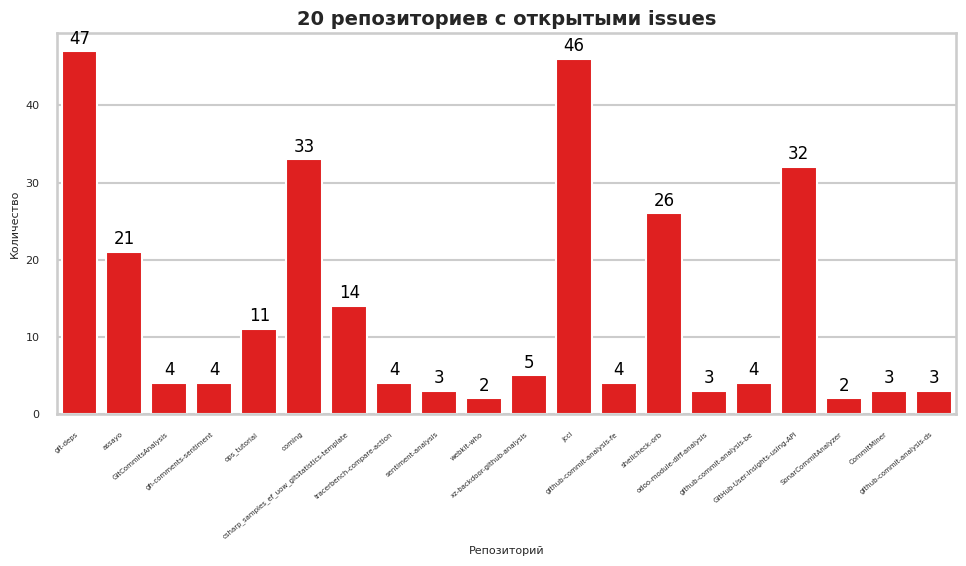

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))

sns.barplot(x='name', y='forks_count', data=repo_data.head(20), color="red")

for index, row in repo_data.head(20).iterrows():
    plt.text(index, row['forks_count'] + 1, round(row['forks_count'], 2),
             color='black', ha="center", fontsize=12)

plt.xticks(rotation=40, ha='right', fontsize=5)
plt.yticks(fontsize=8)
plt.title('20 репозиториев c открытыми issues', fontsize=14, fontweight='bold')
plt.xlabel('Репозиторий', fontsize=8)
plt.ylabel('Количество', fontsize=8)

plt.tight_layout()
plt.show()

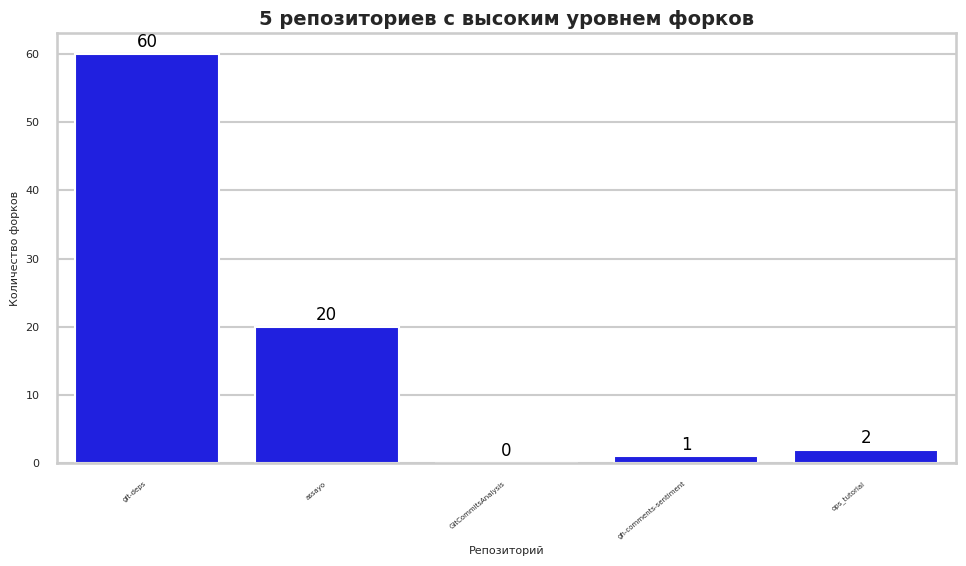

In [16]:
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))

sns.barplot(x='name', y='open_issues_count', data=repo_data.head(5), color="Blue")

for index, row in repo_data.head(5).iterrows():
    plt.text(index, row['open_issues_count'] + 1, round(row['open_issues_count'], 2),
             color='black', ha="center", fontsize=12)

plt.xticks(rotation=40, ha='right', fontsize=5)
plt.yticks(fontsize=8)
plt.title('5 репозиториев с высоким уровнем форков', fontsize=14, fontweight='bold')
plt.xlabel('Репозиторий', fontsize=8)
plt.ylabel('Количество форков', fontsize=8)

plt.tight_layout()
plt.show()

**1.2.7.** Анализ активности пользователей. Проанализируйте активность пользователей, например, по количеству коммитов или участия в pull requests. Для этого можно получить данные о коммитах или pull requests для каждого репозитория.

In [22]:
repo_name = repos[0]['full_name']
commit_response = requests.get(f"{GITHUB_API_URL}/repos/{repo_name}/commits", headers=headers)
commits = commit_response.json()
print(f"Колличество коммитов {repo_name}: {len(commits)}")

Колличество коммитов aspiers/git-deps: 30


In [23]:
repo_name = 'CommitAnalysis'
commit_response = requests.get(f"{GITHUB_API_URL}/repos/{repo_name}/commits", headers=headers)
commits = commit_response.json()
print(f"Колличество коммитов {repo_name}: {len(commits)}")

Колличество коммитов CommitAnalysis: 3


In [24]:
repo_name = repos[0]['full_name']
pulls_response = requests.get(f"{GITHUB_API_URL}/repos/{repo_name}/pulls", headers=headers)
pulls = pulls_response.json()
print(f"Количество Pull requests {repo_name}: {len(pulls)}")

Количество Pull requests aspiers/git-deps: 6


In [25]:
repo_name = 'CommitAnalysis'
pulls_response = requests.get(f"{GITHUB_API_URL}/repos/{repo_name}/pulls", headers=headers)
pulls = pulls_response.json()
print(f"Количество Pull requests {repo_name}: {len(pulls)}")

Количество Pull requests CommitAnalysis: 3
